In [1]:
import numpy as np
import pandas as pd
import matplotlib. pyplot as plt

In [2]:
raw_data = pd.read_excel("ARIMAX - data.xlsx")

# Data Cleaning

In [3]:
raw_data.info

<bound method DataFrame.info of                    Week  Google_App Spends  Google_Discovery Spends  \
0   2022-10-03 00:00:00               0.36                     0.21   
1   2022-10-10 00:00:00               1.21                     0.48   
2   2022-10-17 00:00:00               1.18                     0.43   
3   2022-10-24 00:00:00               0.51                     0.04   
4   2022-10-31 00:00:00               0.62                     0.15   
..                  ...                ...                      ...   
70  2024-05-02 00:00:00               0.21                     0.49   
71  2024-12-02 00:00:00               0.22                     0.16   
72            19/2/2024               0.11                     0.17   
73            26/2/2024               0.28                     0.23   
74  2024-04-03 00:00:00               0.33                     0.16   

    Google_Display Spends  Google_Performance Max Spends  \
0                    0.23                           0.3

In [4]:
x=raw_data.iloc[:74,:28]
y=raw_data.iloc[:74,-1:]/(10**6)

In [5]:
y.shape

(74, 1)

In [6]:
x.insert(0, "Date","",True)
y.insert(0, "Date","",True)

In [7]:
date_range = pd.date_range(start='2022-10-03', end='2024-03-11',freq='7D')
# Create a DataFrame with the date range
df = pd.DataFrame(date_range, columns=['Date'])
x.Date= df
y.Date= df

In [8]:
x.set_index('Date', inplace=True)
y.set_index('Date', inplace=True)

# EDA

In [9]:
x.describe().to_excel("central_tendancy.xlsx")

Central tendency shows high variations in the column wise data. Hence, wont remove outliers. Skipping outliers removal for now

In [10]:
x.corr().to_excel("correlation.xlsx")

C:\Users\milan.raj\AppData\Local\Temp\ipykernel_23248\1720119301.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  x.corr().to_excel("correlation.xlsx")


ATL_Outdoor Spends - ATL_Radio Spends
Google_Discovery Spends - Google_Display Spends
These 2 combination have high correlation. Hence, will remove one from each combination
x columns will reduce to 26 columns

In [11]:
x=x.drop(columns=["ATL_Outdoor Spends","Google_Discovery Spends"])

In [12]:
x.shape[0]*0.1

7.4

# Stationarity

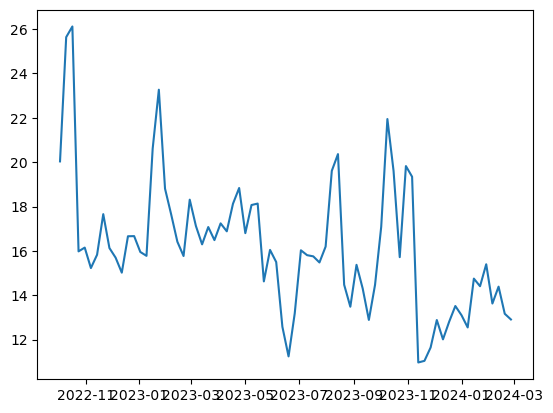

In [13]:
plt.plot(y)
plt.show()

Not stationary. We will have to make the output metrics stationary

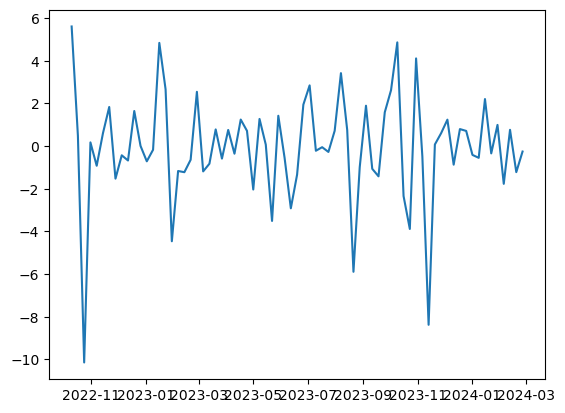

In [14]:
y_diff=y.diff()
plt.plot(y_diff)
plt.show()

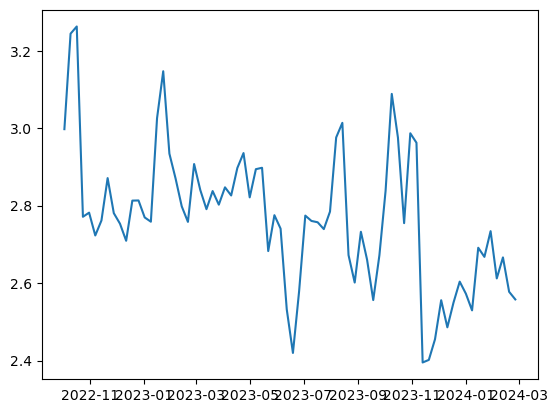

In [15]:
y_log=np.log(y)
plt.plot(y_log)
plt.show()

Looks stationary now. Will do a quick stationarity test

In [16]:
#ADF fuller test
from statsmodels.tsa.stattools import adfuller
adf_test_diff = adfuller(y_diff.dropna())
adf_test_actual = adfuller(y.dropna())
adf_test_log = adfuller(y_log.dropna())
print('Actual test statitics is {} and p- value is {}'.format(adf_test_actual[0],adf_test_actual[1]))
print('Diff test statitics is {} and p- value is {}'.format(adf_test_diff[0],adf_test_diff[1]))
print('Log test statitics is {} and p- value is {}'.format(adf_test_log[0],adf_test_log[1]))

Actual test statitics is -3.19309214586585 and p- value is 0.020388031083779668
Diff test statitics is -4.845832492952461 and p- value is 4.4407388312863205e-05
Log test statitics is -3.6141337606918813 and p- value is 0.005496498996439424


In [17]:
import statsmodels.api as sm
kpss_test_actual = sm.tsa.stattools.kpss(y,regression = 'ct')
kpss_test_diff = sm.tsa.stattools.kpss(y_diff.dropna(),regression = 'ct')
kpss_test_log = sm.tsa.stattools.kpss(y_log.dropna(),regression = 'ct')

print('Actual statitics is {} and p- value is {}'.format(kpss_test_actual[0],kpss_test_actual[1]))
print('Diff test statitics is {} and p- value is {}'.format(kpss_test_diff[0],kpss_test_diff[1]))
print('Log test statitics is {} and p- value is {}'.format(kpss_test_log[0],kpss_test_log[1]))

Actual statitics is 0.039505081193431296 and p- value is 0.1
Diff test statitics is 0.21052437940636656 and p- value is 0.012053357722612538
Log test statitics is 0.03928322328930513 and p- value is 0.1


C:\Users\milan.raj\AppData\Local\Temp\ipykernel_23248\1496161436.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test_actual = sm.tsa.stattools.kpss(y,regression = 'ct')
C:\Users\milan.raj\AppData\Local\Temp\ipykernel_23248\1496161436.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test_log = sm.tsa.stattools.kpss(y_log.dropna(),regression = 'ct')


Both test highlights that y_diff is a stationary data. 

# Train & Test Data

In [18]:
x_test =x.iloc[66:]
x_train =x.iloc[:66]
y_test =y_diff.iloc[66:]
y_train =y_diff.iloc[:66]

In [19]:
x.shape[0]==y.shape[0]

True

In [20]:
x_test.shape[0]==y_test.shape[0]

True

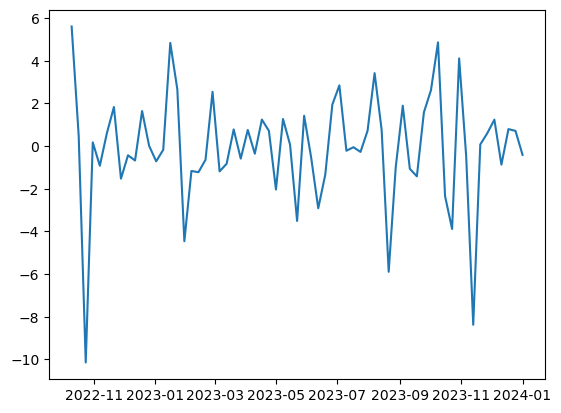

In [21]:
plt.plot(y_train)
plt.show()

# Creating Iterations
Remove FB
Remove Google
Remove ATL ( Print+ TV+Radio)
Remove TV

In [22]:
x.columns

Index(['Week', 'Google_App Spends', 'Google_Display Spends',
       'Google_Performance Max Spends', 'Google_Search Spends',
       'Google_YouTube Spends', 'Google_Shopping Spends',
       'Meta_Catalogue Sales', 'Meta_Conversions', 'Meta_Engagement',
       'Meta_Reach', 'Meta_Sales', 'Meta_Traffic', 'Meta_Video Views',
       'Meta_AAA', 'Meta_Advantage+', 'Meta_DPA', 'Meta_DPA - ViewContent',
       'Meta_Facebook App Install ', 'Meta_Video View',
       'Meta_Website and App Traffic', 'ATL_TV Spends',
       'Digital_Impact + OTT Spends', 'ATL_Print Spends', 'ATL_Radio Spends',
       'Social Media Spends'],
      dtype='object')

In [23]:
x_1=x.drop(columns=['Meta_Catalogue Sales', 'Meta_Conversions', 'Meta_Engagement',
       'Meta_Reach', 'Meta_Sales', 'Meta_Traffic', 'Meta_Video Views',
       'Meta_AAA', 'Meta_Advantage+', 'Meta_DPA', 'Meta_DPA - ViewContent',
       'Meta_Facebook App Install ', 'Meta_Video View',
       'Meta_Website and App Traffic',"Week"])
x_2=x.drop(columns=['Week', 'Google_App Spends', 'Google_Display Spends',
       'Google_Performance Max Spends', 'Google_Search Spends',
       'Google_YouTube Spends', 'Google_Shopping Spends'])
x_3=x.drop(columns=["Week",'ATL_TV Spends', 'ATL_Print Spends', 'ATL_Radio Spends'])
x_4=x.drop(columns=['ATL_TV Spends','Week'])

In [24]:
x_1_test =x_1.iloc[66:]
x_1_train =x_1.iloc[:66]

x_2_test =x_2.iloc[66:]
x_2_train =x_2.iloc[:66]

x_3_test =x_3.iloc[66:]
x_3_train =x_3.iloc[:66]

x_4_test =x_4.iloc[66:]
x_4_train =x_4.iloc[:66]

# Parameters of ARIMAX - p,d,q

In [25]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

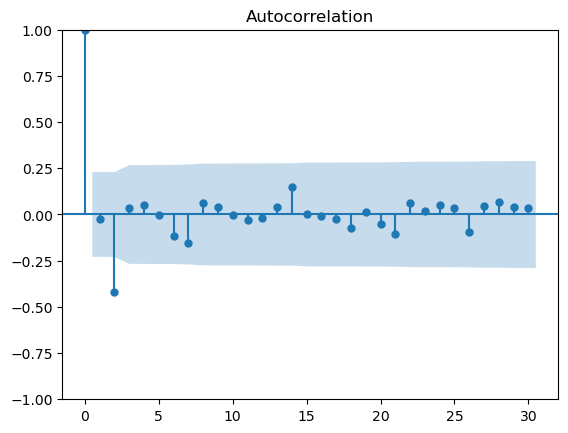

In [26]:
acf_values = plot_acf(y_diff.dropna(),lags=30,alpha =0.05)
plt.show()

MA, lag = 2, p=2

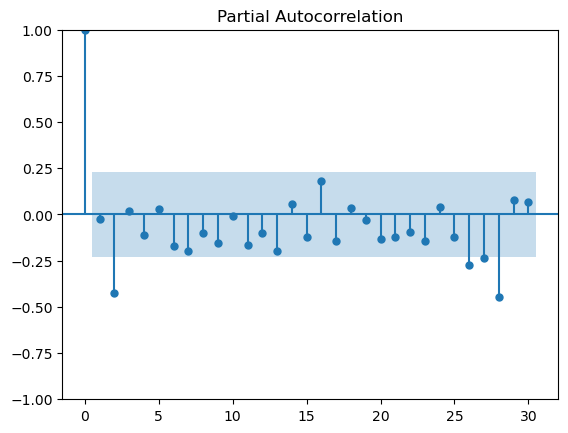

In [27]:
pacf_values = plot_pacf(y_diff.dropna(),lags=30,alpha =0.05,method='ols')
plt.show()

AR, lag = 2, q=2

# Running Arimax Model

In [28]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [29]:
x_2_train.head()

,Meta_Catalogue Sales,Meta_Conversions,Meta_Engagement,Meta_Reach,Meta_Sales,Meta_Traffic,Meta_Video Views,Meta_AAA,Meta_Advantage+,Meta_DPA,Meta_DPA - ViewContent,Meta_Facebook App Install,Meta_Video View,Meta_Website and App Traffic,ATL_TV Spends,Digital_Impact + OTT Spends,ATL_Print Spends,ATL_Radio Spends,Social Media Spends
Date,,,,,,,,,,,,,,,,,,,
2022-10-03,0.000000,0.607465,0.487325,0.083061,0.0,0.101223,0.011474,0.216030,0.0,1.160761,0.077370,0.016312,0.000000,0.774618,1.384615,0.046154,2.2,0.0,0.018
2022-10-10,0.000000,0.353709,0.764123,0.420597,0.0,0.383761,0.095100,0.684697,0.0,1.495466,0.102776,0.158048,0.093422,1.325523,4.500000,0.150000,3.0,0.1,0.019
2022-10-17,0.000000,0.455203,0.987970,0.265178,0.0,0.386520,0.028067,0.877350,0.0,1.401463,0.216610,0.063977,0.028067,0.355715,4.500000,0.150000,6.6,0.1,0.015
2022-10-24,0.000000,0.197949,0.354763,0.032668,0.0,0.023530,0.000000,0.033246,0.0,0.447199,0.000200,0.000000,0.000000,0.412086,0.000000,0.000000,0.0,0.0,0.015
2022-10-31,0.093624,1.037740,0.333497,0.000000,0.0,0.113148,0.000000,0.052322,0.0,0.770320,0.061777,0.000000,0.000000,0.056806,0.000000,0.000000,0.0,0.0,0.015


In [30]:
y_train.index

DatetimeIndex(['2022-10-03', '2022-10-10', '2022-10-17', '2022-10-24',
               '2022-10-31', '2022-11-07', '2022-11-14', '2022-11-21',
               '2022-11-28', '2022-12-05', '2022-12-12', '2022-12-19',
               '2022-12-26', '2023-01-02', '2023-01-09', '2023-01-16',
               '2023-01-23', '2023-01-30', '2023-02-06', '2023-02-13',
               '2023-02-20', '2023-02-27', '2023-03-06', '2023-03-13',
               '2023-03-20', '2023-03-27', '2023-04-03', '2023-04-10',
               '2023-04-17', '2023-04-24', '2023-05-01', '2023-05-08',
               '2023-05-15', '2023-05-22', '2023-05-29', '2023-06-05',
               '2023-06-12', '2023-06-19', '2023-06-26', '2023-07-03',
               '2023-07-10', '2023-07-17', '2023-07-24', '2023-07-31',
               '2023-08-07', '2023-08-14', '2023-08-21', '2023-08-28',
               '2023-09-04', '2023-09-11', '2023-09-18', '2023-09-25',
               '2023-10-02', '2023-10-09', '2023-10-16', '2023-10-23',
      

In [31]:
sarimax_1 = SARIMAX(y_train,exog = x_1_train, order =(2,0,2))
sarimax_results_1 = sarimax_1.fit(disp=0)

C:\Users\milan.raj\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
C:\Users\milan.raj\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
C:\Users\milan.raj\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [32]:
start = len(x_1_train)
end = len(x_1_train)+len(x_1_test)-1
sarimax_pred_1 = sarimax_results_1.predict(start,end,exog=x_1_test)


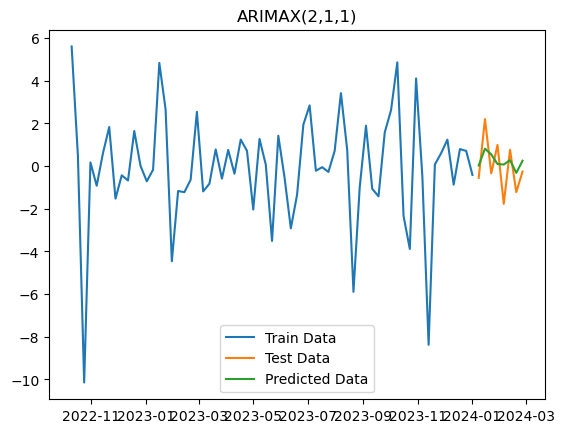

In [33]:
plt.plot(y_train,label = "Train Data")
plt.plot(y_test,label = "Test Data")
plt.plot(sarimax_pred_1,label = "Predicted Data")
plt.legend()
plt.title("ARIMAX(2,1,1)")
plt.show()

In [34]:
mae =mean_absolute_error(sarimax_pred_1,y_test)
mse = mean_squared_error(sarimax_pred_1,y_test)
rmse = np.sqrt(mean_squared_error(sarimax_pred_1,y_test))

In [35]:
perf ={"arimax_mae_1":mae,"arimax_mse_1":mse,"arimax_rmse_1":rmse}
arimax_perf = pd.DataFrame([perf])
arimax_perf

,arimax_mae_1,arimax_mse_1,arimax_rmse_1
0,0.934931,1.066968,1.032942


In [36]:
arimax_perf.insert(0, "Iteration Type","",True)
arimax_perf['Iteration Type'].iloc[0]= "Data without FB"
arimax_perf

C:\Users\milan.raj\AppData\Local\Temp\ipykernel_23248\279204480.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arimax_perf['Iteration Type'].iloc[0]= "Data without FB"


,Iteration Type,arimax_mae_1,arimax_mse_1,arimax_rmse_1
0,Data without FB,0.934931,1.066968,1.032942


In [37]:
arimax_perf.to_excel("arimax_perf_1.xlsx")

In [38]:
x_2_train=x_2_train.fillna(0)
x_3_train=x_3_train.fillna(0)
x_4_train=x_4_train.fillna(0)

x_2_test=x_2_test.fillna(0)
x_3_test=x_3_test.fillna(0)
x_4_test=x_4_test.fillna(0)


In [39]:
x_2_train.iloc[:-1]

,Meta_Catalogue Sales,Meta_Conversions,Meta_Engagement,Meta_Reach,Meta_Sales,Meta_Traffic,Meta_Video Views,Meta_AAA,Meta_Advantage+,Meta_DPA,Meta_DPA - ViewContent,Meta_Facebook App Install,Meta_Video View,Meta_Website and App Traffic,ATL_TV Spends,Digital_Impact + OTT Spends,ATL_Print Spends,ATL_Radio Spends,Social Media Spends
Date,,,,,,,,,,,,,,,,,,,
2022-10-03,0.000000,0.607465,0.487325,0.083061,0.000000,0.101223,0.011474,0.216030,0.0,1.160761,0.077370,0.016312,0.000000,0.774618,1.384615,0.046154,2.2,0.0,0.018
2022-10-10,0.000000,0.353709,0.764123,0.420597,0.000000,0.383761,0.095100,0.684697,0.0,1.495466,0.102776,0.158048,0.093422,1.325523,4.500000,0.150000,3.0,0.1,0.019
2022-10-17,0.000000,0.455203,0.987970,0.265178,0.000000,0.386520,0.028067,0.877350,0.0,1.401463,0.216610,0.063977,0.028067,0.355715,4.500000,0.150000,6.6,0.1,0.015
2022-10-24,0.000000,0.197949,0.354763,0.032668,0.000000,0.023530,0.000000,0.033246,0.0,0.447199,0.000200,0.000000,0.000000,0.412086,0.000000,0.000000,0.0,0.0,0.015
2022-10-31,0.093624,1.037740,0.333497,0.000000,0.000000,0.113148,0.000000,0.052322,0.0,0.770320,0.061777,0.000000,0.000000,0.056806,0.000000,0.000000,0.0,0.0,0.015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-27,0.000000,0.128892,0.033265,0.135760,0.000000,0.062660,0.498294,0.010763,0.0,0.239043,0.193433,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.034
2023-12-04,0.000000,0.179575,0.066317,0.384918,0.199809,0.188361,0.239470,0.015761,0.0,0.472382,0.117167,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.275
2023-12-11,0.000000,0.123513,0.059873,0.131472,0.145041,0.132489,0.000000,0.015745,0.0,0.315652,0.109203,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.103


In [40]:
sarimax_2 = SARIMAX(y_train,exog = x_2_train, order =(2,0,2))
sarimax_results_2 = sarimax_2.fit(disp=0)

sarimax_3 = SARIMAX(y_train,exog = x_3_train, order =(2,0,2))
sarimax_results_3 = sarimax_3.fit(disp=0)

sarimax_4 = SARIMAX(y_train,exog = x_4_train, order =(2,0,2))
sarimax_results_4 = sarimax_4.fit(disp=0)

C:\Users\milan.raj\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
C:\Users\milan.raj\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
C:\Users\milan.raj\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\milan.raj\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
C:\Users\milan.raj\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa

In [49]:
start = len(x_1_train)
end = len(x_1_train)+len(x_1_test)-2

sarimax_pred_2 = sarimax_results_2.predict(start,end,exog=x_2_test.iloc[:7])
sarimax_pred_3 = sarimax_results_3.predict(start,end,exog=x_3_test.iloc[:7])
sarimax_pred_4 = sarimax_results_4.predict(start,end,exog=x_4_test.iloc[:7])

In [42]:
sarimax_pred_2

2024-01-08    1.155371
2024-01-15    0.602277
2024-01-22    0.558950
2024-01-29   -0.393713
2024-02-05    0.466513
2024-02-12   -0.243903
2024-02-19   -0.418907
2024-02-26    9.928170
Freq: W-MON, Name: predicted_mean, dtype: float64

In [47]:
x_2_test.iloc[:7]

,Meta_Catalogue Sales,Meta_Conversions,Meta_Engagement,Meta_Reach,Meta_Sales,Meta_Traffic,Meta_Video Views,Meta_AAA,Meta_Advantage+,Meta_DPA,Meta_DPA - ViewContent,Meta_Facebook App Install,Meta_Video View,Meta_Website and App Traffic,ATL_TV Spends,Digital_Impact + OTT Spends,ATL_Print Spends,ATL_Radio Spends,Social Media Spends
Date,,,,,,,,,,,,,,,,,,,
2024-01-08,0.0,0.131041,0.022185,0.321365,0.160380,0.052675,0.002000,0.017217,0.023484,0.439338,0.115094,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.017
2024-01-15,0.0,0.172742,0.153261,0.499967,0.188234,0.110904,0.147821,0.026372,0.047865,0.679807,0.238755,0.0,0.0,0.0,0.0,0.00,0.61,0.0,0.280
2024-01-22,0.0,0.140312,0.104622,0.221816,0.371303,0.109965,0.730679,0.013811,0.021684,0.466777,0.114395,0.0,0.0,0.0,0.0,0.11,0.00,0.0,0.160
2024-01-29,0.0,0.174932,0.066045,0.122124,0.160040,0.069323,0.430805,0.028017,0.025968,0.454376,0.086036,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.020
2024-02-05,0.0,0.196302,0.043868,0.297443,0.284197,0.081542,0.309195,0.037444,0.015652,0.510101,0.176439,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.020
2024-02-12,0.0,0.135578,0.039682,0.132572,0.062425,0.064757,0.000000,0.029970,0.017966,0.345845,0.140282,0.0,0.0,0.0,0.0,0.40,0.00,0.0,0.030
2024-02-19,0.0,0.141343,0.028003,0.147648,0.112189,0.061817,0.000000,0.014101,0.025346,0.418939,0.162459,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.020


In [51]:
mae_2 =mean_absolute_error(sarimax_pred_2,y_test.iloc[:7])
mse_2 = mean_squared_error(sarimax_pred_2,y_test.iloc[:7])
rmse_2 = np.sqrt(mean_squared_error(sarimax_pred_2,y_test.iloc[:7]))

mae_3 =mean_absolute_error(sarimax_pred_3,y_test.iloc[:7])
mse_3 = mean_squared_error(sarimax_pred_3,y_test.iloc[:7])
rmse_3 = np.sqrt(mean_squared_error(sarimax_pred_3,y_test.iloc[:7]))

mae_4 =mean_absolute_error(sarimax_pred_4,y_test.iloc[:7])
mse_4 = mean_squared_error(sarimax_pred_4,y_test.iloc[:7])
rmse_4 = np.sqrt(mean_squared_error(sarimax_pred_4,y_test.iloc[:7]))

In [52]:
perf_1 ={
    "arimax_mae":mae,
    "arimax_mse":mse,
    "arimax_rmse":rmse
}

perf_2 ={
    "arimax_mae":mae_2,
    "arimax_mse":mse_2,
    "arimax_rmse":rmse_2
}

perf_3 ={
    "arimax_mae":mae_3,
    "arimax_mse":mse_3,
    "arimax_rmse":rmse_3
}

perf_4 ={
    "arimax_mae":mae_4,
    "arimax_mse":mse_4,
    "arimax_rmse":rmse_4
}

arimax_perf=pd.DataFrame([perf_1])
arimax_perf=arimax_perf.append([perf_2], ignore_index=True)
arimax_perf=arimax_perf.append([perf_3], ignore_index=True)
arimax_perf=arimax_perf.append([perf_4], ignore_index=True)


arimax_perf.insert(0, "Iteration Type","",True)
arimax_perf['Iteration Type'].iloc[0]= "Data without FB"
arimax_perf['Iteration Type'].iloc[1]= "Data without Google"
arimax_perf['Iteration Type'].iloc[2]= "Data without ATL/BTL"
arimax_perf['Iteration Type'].iloc[3]= "Data without TV"

arimax_perf


C:\Users\milan.raj\AppData\Local\Temp\ipykernel_23248\3228962088.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  arimax_perf=arimax_perf.append([perf_2], ignore_index=True)
C:\Users\milan.raj\AppData\Local\Temp\ipykernel_23248\3228962088.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  arimax_perf=arimax_perf.append([perf_3], ignore_index=True)
C:\Users\milan.raj\AppData\Local\Temp\ipykernel_23248\3228962088.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  arimax_perf=arimax_perf.append([perf_4], ignore_index=True)
C:\Users\milan.raj\AppData\Local\Temp\ipykernel_23248\3228962088.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentatio

,Iteration Type,arimax_mae,arimax_mse,arimax_rmse
0,Data without FB,0.934931,1.066968,1.032942
1,Data without Google,1.376899,2.123199,1.457120
2,Data without ATL/BTL,1.421308,3.085857,1.756661
3,Data without TV,1.357690,2.349142,1.532691


In [53]:
arimax_perf.to_excel("Arimax_result.xlsx")

In [52]:
sarimax_pred_2

2024-01-08    1.155371
2024-01-15    0.602277
2024-01-22    0.558950
2024-01-29   -0.393713
2024-02-05    0.466513
2024-02-12   -0.243903
2024-02-19   -0.418907
2024-02-26    9.928170
Freq: W-MON, Name: predicted_mean, dtype: float64

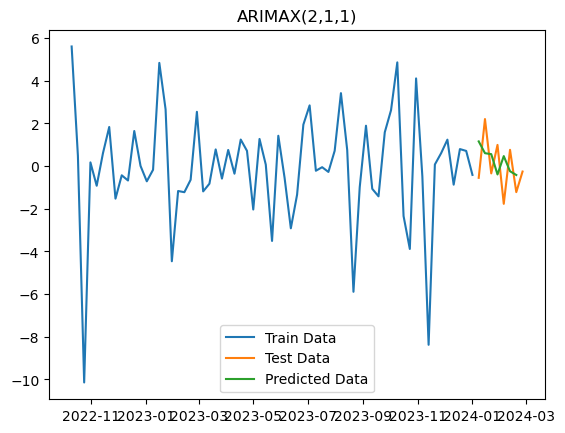

In [54]:
plt.plot(y_train,label = "Train Data")
plt.plot(y_test,label = "Test Data")
plt.plot(sarimax_pred_2,label = "Predicted Data")
plt.legend()
plt.title("ARIMAX(2,1,1)")
plt.show()

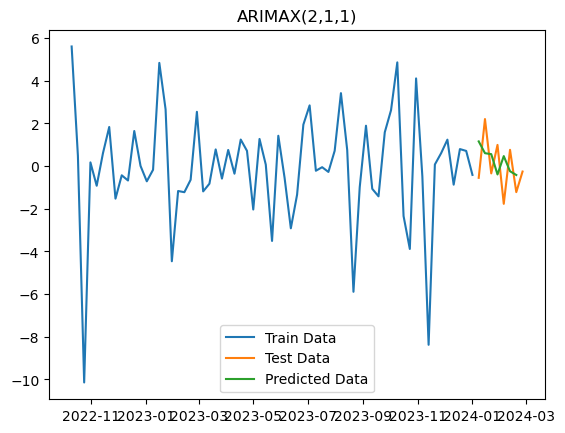

In [55]:
plt.plot(y_train,label = "Train Data")
plt.plot(y_test,label = "Test Data")
plt.plot(sarimax_pred_2,label = "Predicted Data")
plt.legend()
plt.title("ARIMAX(2,1,1)")
plt.show()

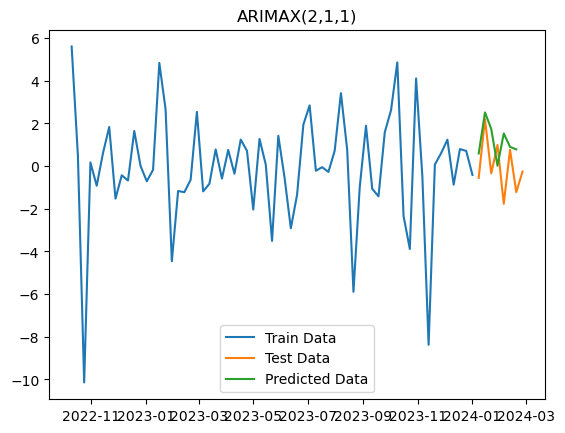

In [56]:
plt.plot(y_train,label = "Train Data")
plt.plot(y_test,label = "Test Data")
plt.plot(sarimax_pred_3,label = "Predicted Data")
plt.legend()
plt.title("ARIMAX(2,1,1)")
plt.show()